,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(42000, 785)

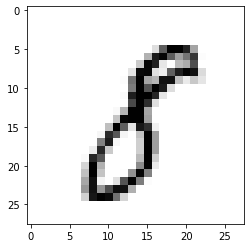

Epoch 1/1000
41/41 [==============================] - 2s 30ms/step - loss: 1.7345 - accuracy: 0.4302 - val_loss: 0.3541 - val_accuracy: 0.8924
Epoch 2/1000
41/41 [==============================] - 1s 18ms/step - loss: 0.2865 - accuracy: 0.9126 - val_loss: 0.2387 - val_accuracy: 0.9290
Epoch 3/1000
41/41 [==============================] - 1s 18ms/step - loss: 0.1539 - accuracy: 0.9554 - val_loss: 0.1999 - val_accuracy: 0.9440
Epoch 4/1000
41/41 [==============================] - 1s 23ms/step - loss: 0.1167 - accuracy: 0.9640 - val_loss: 0.1912 - val_accuracy: 0.9442
Epoch 5/1000
41/41 [==============================] - 1s 24ms/step - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.1649 - val_accuracy: 0.9505
Epoch 6/1000
41/41 [==============================] - 1s 24ms/step - loss: 0.0703 - accuracy: 0.9774 - val_loss: 0.1460 - val_accuracy: 0.9627
Epoch 7/1000
41/41 [==============================] - 1s 24ms/step - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.1740 - val_accuracy: 0.9542

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Colab/MNIST/train.csv')
display(df.head(), df.shape)

# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values

plt.imshow(img_data[5000].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

# train, test 데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# keras 구현
model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=1000,
                    verbose=1,
                    validation_split=0.3,
                    batch_size=512)

In [ ]:
print(model.evaluate(x_data_test_norm,t_data_test))

394/394 [==============================] - 1s 1ms/step - loss: 0.4987 - accuracy: 0.9723
[0.4987039864063263, 0.9723016023635864]
